In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Online_Retail_Cleaned.csv')

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year-Month,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2010-12,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,2010-12,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2010-12,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,2010-12,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,2010-12,3.39,17850,United Kingdom,20.34


In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390942 entries, 0 to 390941
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    390942 non-null  int64         
 1   StockCode    390942 non-null  object        
 2   Description  390942 non-null  object        
 3   Quantity     390942 non-null  int64         
 4   InvoiceDate  390942 non-null  datetime64[ns]
 5   Year-Month   390942 non-null  object        
 6   UnitPrice    390942 non-null  float64       
 7   CustomerID   390942 non-null  int64         
 8   Country      390942 non-null  object        
 9   Total Price  390942 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 29.8+ MB


In [19]:
monthly_activity = df.groupby(['CustomerID', 'Year-Month']).agg(Total_Spent=('Total Price', 'sum'),TransactionCount=('InvoiceNo', 'nunique')).reset_index()

In [20]:
monthly_activity.head()

,CustomerID,Year-Month,Total_Spent,TransactionCount
0,12346,2011-01,77183.60,1
1,12347,2010-12,711.79,1
2,12347,2011-01,475.39,1
3,12347,2011-04,636.25,1
4,12347,2011-06,382.52,1


In [21]:
last_month = monthly_activity['Year-Month'].max()

In [23]:
last_month

'2011-12'

In [27]:
pivot = monthly_activity.pivot_table(index='CustomerID', columns='Year-Month', values='TransactionCount', fill_value=0)

In [32]:
pivot

Year-Month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
12348,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [78]:
pivot_binary = pivot.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\muham\AppData\Local\Temp\ipykernel_18304\2093233324.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_binary = pivot.applymap(lambda x: 1 if x > 0 else 0)


In [79]:
pivot_binary

Year-Month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0,0
12347,1,1,0,0,1,0,1,0,1,0,1,0,1
12348,1,1,0,0,1,0,0,0,0,1,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,0,1,0
12350,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,1,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,1,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,1,0,0,0,1


In [81]:
last_month = pivot_binary.columns.max()

In [82]:
last_active_month = pivot_binary.apply(lambda row: row[row == 1].index.max(), axis=1)

In [83]:
last_active_month

CustomerID
12346    2011-01
12347    2011-12
12348    2011-09
12349    2011-11
12350    2011-02
          ...   
18280    2011-03
18281    2011-06
18282    2011-12
18283    2011-12
18287    2011-10
Length: 4331, dtype: object

In [84]:
pivot_binary['Last_Active_Month'] = last_active_month

In [85]:
pivot_binary

Year-Month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Last_Active_Month
CustomerID,,,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0,0,2011-01
12347,1,1,0,0,1,0,1,0,1,0,1,0,1,2011-12
12348,1,1,0,0,1,0,0,0,0,1,0,0,0,2011-09
12349,0,0,0,0,0,0,0,0,0,0,0,1,0,2011-11
12350,0,0,1,0,0,0,0,0,0,0,0,0,0,2011-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,1,0,0,0,0,0,0,0,0,0,2011-03
18281,0,0,0,0,0,0,1,0,0,0,0,0,0,2011-06
18282,0,0,0,0,0,0,0,0,1,0,0,0,1,2011-12


In [86]:
pivot_binary['Last_Active_Month'] = pd.to_datetime(pivot_binary['Last_Active_Month'])
last_month = pd.to_datetime(pivot_binary.columns[:-1].max())

In [87]:
pivot_binary

Year-Month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Last_Active_Month
CustomerID,,,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0,0,2011-01-01
12347,1,1,0,0,1,0,1,0,1,0,1,0,1,2011-12-01
12348,1,1,0,0,1,0,0,0,0,1,0,0,0,2011-09-01
12349,0,0,0,0,0,0,0,0,0,0,0,1,0,2011-11-01
12350,0,0,1,0,0,0,0,0,0,0,0,0,0,2011-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,1,0,0,0,0,0,0,0,0,0,2011-03-01
18281,0,0,0,0,0,0,1,0,0,0,0,0,0,2011-06-01
18282,0,0,0,0,0,0,0,0,1,0,0,0,1,2011-12-01


In [88]:
pivot_binary['MonthSinceLastActive'] = (
    (last_month.year - pivot_binary['Last_Active_Month'].dt.year) * 12 +
    (last_month.month - pivot_binary['Last_Active_Month'].dt.month)
)

In [89]:
pivot_binary

Year-Month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Last_Active_Month,MonthSinceLastActive
CustomerID,,,,,,,,,,,,,,,
12346,0,1,0,0,0,0,0,0,0,0,0,0,0,2011-01-01,11
12347,1,1,0,0,1,0,1,0,1,0,1,0,1,2011-12-01,0
12348,1,1,0,0,1,0,0,0,0,1,0,0,0,2011-09-01,3
12349,0,0,0,0,0,0,0,0,0,0,0,1,0,2011-11-01,1
12350,0,0,1,0,0,0,0,0,0,0,0,0,0,2011-02-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,1,0,0,0,0,0,0,0,0,0,2011-03-01,9
18281,0,0,0,0,0,0,1,0,0,0,0,0,0,2011-06-01,6
18282,0,0,0,0,0,0,0,0,1,0,0,0,1,2011-12-01,0


In [90]:
def label_segment(month):
    if month < 2:
        return 'Active'
    elif month == 2:
        return 'At Risk'
    else:
        return 'Churned'

In [91]:
pivot_binary['Segment'] = pivot_binary['MonthSinceLastActive'].apply(label_segment)

In [93]:
pivot_binary['Segment'].value_counts()

Segment
Active     1905
Churned    1771
At Risk     655
Name: count, dtype: int64

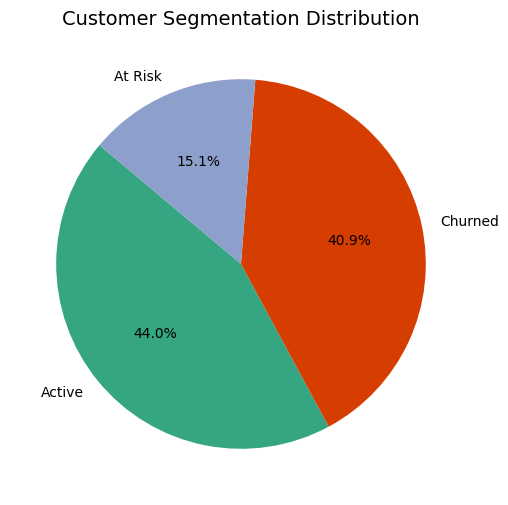

In [102]:
segment_counts = pivot_binary['Segment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#35a582","#d63d00",'#8da0cb'])
plt.title('Customer Segmentation Distribution', fontsize=14)
plt.show()
